# **Predicting F-1 Season Winners for Constructors' Championship**

Fall 2024 Data Science Project

By: Shubh Sharma, Anirudha Kumar, Bhakti Hegde, Debarshi Dey,  Rajat Baldawa

### *Contributions*:
Shubh: Shubh worked on the ML Algorithm Design/Development and the Final Tutorial Report Creation.

Anirudha: Anirudha worked on the ML Algorithm Training and Test Data Analysis and the Final Tutorial Report Creation.

Bhakti: Bhakti worked on the Data Curation and Preprocessing and Final Tutorial Report Creation.

Debarshi: Debarshi worked on Data Exploration and Summary Statistics and Final Tutorial Report Creation.

Rajat: Rajat worked on the Project Idea and Final Tutorial Report Creation.


In [1]:
from IPython.display import Image
Image(url='https://media0.giphy.com/media/2uIo19WIvRXjT0vwyr/giphy.gif?cid=6c09b9521ldkzxhjirx9pqmwz1qqj9rcy3blmoe1908oic4x&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g')

## ***Introduction***

Formula One (F1) is the pinnacle of open-wheel, single-seater racing, governed by the Fédération Internationale de l'Automobile (FIA). This global sport captivates millions, with each race drawing between 60 to 70 million spectators worldwide. Within the championship lie two fiercely contested titles: the Constructors' Championship and the Drivers' Championship, with the former awarded to the team that amasses the most points over the season.
Our project seeks to answer a compelling question: Who will win the Formula One Constructors' Championship? Answering this question is important for several reasons. Predicting championship outcomes holds immense value for teams, fans, and stakeholders, providing insights into performance trends and influencing strategic decision-making. Moreover, accurate predictions can highlight the role of technology, driver skill, and team strategies in shaping success, demonstrating how data analytics revolutionizes the sport.
To achieve this, we will follow the Data Science Life Cycle, a systematic approach encompassing:


The Data Science Life Cycle:
*   Data Collection
*   Data Processing
*   Exploratory Analysis & Data Visualization
*   Analysis, Hypothesis Testing & ML
*   Insights & Policy Decision



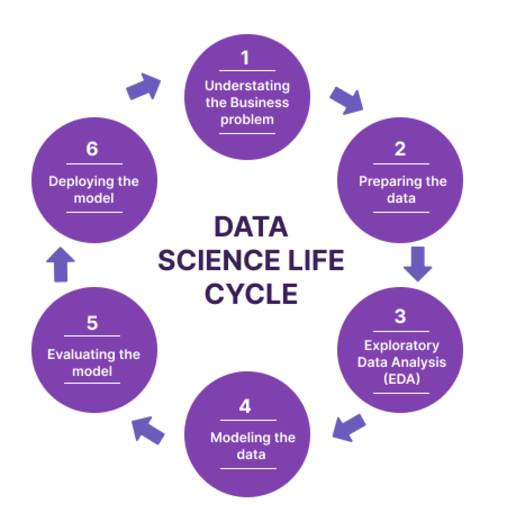


The dataset we are using is sourced from Kaggle, titled the Formula 1 World Championship. It includes rich historical data spanning from 1950 to the current 2024 season, detailing drivers, constructors, qualifying performances, circuits, pit stops, lap times, and more. This extensive dataset allows for comprehensive analysis and serves as the foundation for building predictive models.
Through this project, we aim to demonstrate the power of data-driven decision-making in understanding and forecasting outcomes in Formula One racing.


If you are new to Formula 1, we suggest watching this quick five minute video which provides a good [Beginner's Guide to F1](/https://www.youtube.com/watch?v=Q-jjZMMxbZs&ab_channel=FORMULA1)



To download the data we will be utilizing the Kaggle API, in order to make sure that you are able to follow this tutorial make sure you create a Kaggle Account and create a new Token. More directions can be found here: https://www.kaggle.com/docs/api.  


In [ ]:
# make sure to follow the directions on the link above, to create a new token and download kaggle.json

from google.colab import files

# Upload kaggle.json
files.upload()

# Create the .config/kaggle directory (if not exists)
!mkdir -p ~/.config/kaggle

# Move the kaggle.json to the correct location
!mv kaggle.json ~/.config/kaggle/

# Set permissions to secure the file
!chmod 600 ~/.config/kaggle/kaggle.json

# Check if the file is in the right place
!ls -l ~/.config/kaggle/kaggle.json



Saving kaggle.json to kaggle.json
-rw------- 1 root root 70 Dec  4 00:11 /root/.config/kaggle/kaggle.json


In [ ]:
# downloads the Formula 1 racing data using the kaggle api
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_CONFIG_DIR'] = './kaggle.json'

api = KaggleApi()
api.authenticate()

download_path = "/Users/AnirudhaKumar/Desktop/"

api.dataset_download_files("rohanrao/formula-1-world-championship-1950-2020", path=download_path, unzip=True)

print("Download completed!")


Dataset URL: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
Download completed!


## ***Data Curation***

For our project, we utilized the “Formula 1 World Championship” dataset from Kaggle. This dataset spans the history of Formula 1 racing, covering data from 1950 to the present (2024). It includes detailed records of races, drivers, constructors, circuits, lap times, and more. This extensive dataset offers a comprehensive view of the Formula 1 World Championship and serves as a foundation for analyzing trends and predicting race outcomes.The dataset is organized into multiple CSV files each representing different aspects of the F1 race data.

The initial raw data was loaded into pandas DataFrames to facilitate cleaning and transformation. Our objective was to prepare the data for analysis by ensuring consistency, handling missing values, and merging related datasets for a more comprehensive analysis.

We performed several key preprocessing steps:

1.  Loading the Data
 *  All CSV files were loaded into pandas DataFrames using the pd.read_csv() function. This allowed for easy manipulation and integration of different data sources
2.   Data Cleaning
  * We implemented a cleaning function, clean_data, to preprocess the DataFrames. This function performs the following operations:
   * Column Selection - we select specific columns from the DataFrame to focus on relevant data, ensuring a more manageable dataset
   * Handling Missing Data - rows with missing values (NaN) were removed using the drop_na=True parameter to ensure that the dataset is free from incomplete entries
   * Removing Duplicates - duplicate rows were identified and removed using the drop_duplicates=True parameter, ensuring that the dataset does not contain redundant data points

  This function, clean_data, is designed to preprocess a DataFrame by optionally selecting specific columns, dropping rows with missing values (NaN), and removing duplicate rows. If columns are specified, only those columns are retained. The parameters drop_na and drop_duplicates, which default to True, control whether rows with missing values and duplicates are removed, ensuring a cleaner and more consistent dataset.


3. Merging Datasets
 *  After cleaning the individual files, we merged them into a single, consolidated DataFrame using common columns such as raceId, driverId, and constructorId. This step allowed us to combine race results, driver information, and constructor details, creating a unified dataset for analysis.
 4. Final Preparation
  *  After cleaning and transforming the data, we ensured that the dataset was ready for machine learning analysis by setting up the DataFrame with appropriate data types and ensuring all features were correctly formatted for modeling.


If you would like to delve deeper into this topic, we suggest reading this very informative article which provides in-depth explanations on data preprocessing and how it can be useful.

Link: https://lakefs.io/blog/data-preprocessing-in-machine-learning/


In [ ]:
import pandas as pd
import os

download_path = "/Users/AnirudhaKumar/Desktop/"

os.chdir(download_path)

# reads all the csv present in dataset
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

# clean data function used to drop na/duplicates
def clean_data(df, columns=None, drop_na=True, drop_duplicates=True):
    if columns:
        df = df[columns]
    if drop_na:
        df = df.dropna()
    if drop_duplicates:
        df = df.drop_duplicates()
    return df

circuits = clean_data(circuits, ['circuitId', 'name', 'location', 'country'])
constructor_results = clean_data(constructor_results, ['constructorId', 'raceId', 'points'])
constructor_standings = clean_data(constructor_standings, ['constructorId', 'raceId', 'points'])
constructors = clean_data(constructors, ['constructorId', 'name', 'nationality'])
driver_standings = clean_data(driver_standings, ['driverId', 'raceId', 'points', 'position'])
drivers = clean_data(drivers, ['driverId', 'driverRef', 'forename', 'surname', 'dob', 'nationality'])
lap_times = clean_data(lap_times, ['raceId', 'driverId', 'lap', 'time'])
pit_stops = clean_data(pit_stops, ['raceId', 'driverId', 'stop', 'lap', 'duration'])
qualifying = clean_data(qualifying, ['raceId', 'driverId', 'constructorId', 'position'])
races = clean_data(races, ['raceId', 'year', 'round', 'circuitId', 'name', 'date'])
results = clean_data(results, ['raceId', 'driverId', 'constructorId', 'position', 'points', 'laps'])
sprint_results = clean_data(sprint_results, ['raceId', 'driverId', 'constructorId', 'position', 'points'])
status = clean_data(status, ['statusId', 'status'])

drivers.head()

,driverId,driverRef,forename,surname,dob,nationality
0,1,hamilton,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,Nico,Rosberg,1985-06-27,German
3,4,alonso,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,Heikki,Kovalainen,1981-10-19,Finnish


## ***Exploratory Data Analysis***

The initial step of our project involved Exploratory Data Analysis (EDA) and the calculation of summary statistics to understand the characteristics of the dataset and the relationships between variables. This process is critical for identifying patterns, spotting anomalies, and preparing the data for machine learning models. Here’s a detailed breakdown of what we did:

Summary Statistics with describe():

Using the describe() method, we generated summary statistics for numerical features in the dataset, such as points, laps, and other race-related metrics.

This provided key measures:
Count: The number of non-missing observations for each column.

Mean: The average value, representing the central tendency of the data.

Standard Deviation (std): The spread of the data, helping us understand variability.

Min/Max: The range of the data, highlighting potential outliers or extreme values.

Quartiles (25%, 50%, 75%): Indicators of the data’s distribution and spread.

What These Mean for Our Project:
High variability in points and laps suggests that different constructors and drivers perform inconsistently across races.
Extreme values in points may indicate outliers (e.g., races with unusual outcomes).
Summary statistics allowed us to validate the dataset's integrity by identifying missing or unusual data points.



*If you are beginner to Data Science and want to learn about EDA check out this link: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

*However, if you are more experienced and want to refresh your skills check out this article: https://www.ibm.com/topics/exploratory-data-analysis

In [ ]:
constructor_standings.describe()

,constructorId,raceId,points
count,13271.000000,13271.000000,13271.000000
mean,49.219124,529.946425,35.681072
std,60.744968,303.677642,80.561030
min,1.000000,1.000000,0.000000
25%,6.000000,300.000000,0.000000
50%,25.000000,504.000000,7.000000
75%,58.000000,733.000000,32.000000
max,215.000000,1132.000000,860.000000


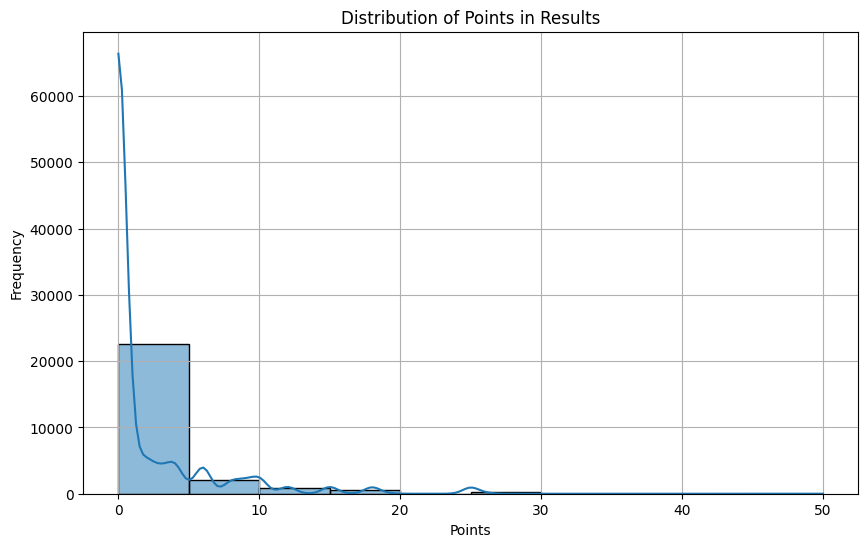

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(results['points'], bins=10, kde=True)
plt.title('Distribution of Points in Results')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Statistical Method 1 Finding: What we find is that the largest proportion of drivers have points between the 0 and 5 threshold, which makes sense since a large of proportion of drivers either do not finish, or place at the bottom of the leaderboard and do not earn any points. It also is interesting as there are little bumps in the graph, which shows that the points are discrete numbers, and that while on the tail end it is mostly 0, there is 1 driver that hits the 25 points mark, since that is first place. Nothing is too over represented, and there is only one feature we are looking at here, which is the distribution of points. There is no outlier, but the points total of 25 is farther on the right side.

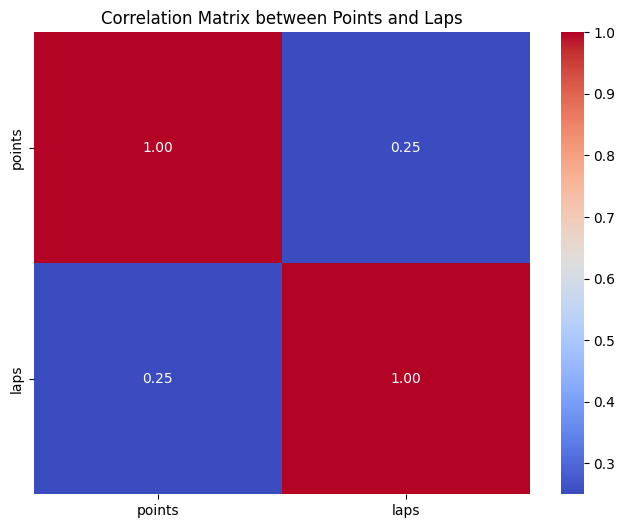

In [ ]:
correlation_matrix = results[['points', 'laps']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Points and Laps')
plt.show()

Statistical Method 2 Findings: What we can see from the correlation matrix is that the relationship between points and labs is that it has a very very low correlation with each other, showing that they are actually not positively correlated whatosever. This makes sense as more laps would indicate a lower point total, so having a high correlation would not make much sense. However, I would think that it would be negative, which did confuse us at first. The features represented here are points and laps, neither being too over represented, and we cannot see outliers here

In [ ]:
from scipy import stats

constructor_a_points = results[results['constructorId'] == 1]['points']
constructor_b_points = results[results['constructorId'] == 2]['points']

t_stat, p_value = stats.ttest_ind(constructor_a_points, constructor_b_points)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    conclusion = "reject the null hypothesis"
else:
    conclusion = "fail to reject the null hypothesis"

print(f"Conclusion: We {conclusion} that the average points differ between Constructor A and Constructor B.")


T-statistic: 3.2176923054789794, P-value: 0.0013125541781412284
Conclusion: We reject the null hypothesis that the average points differ between Constructor A and Constructor B.


Statistical Method 3 Findings: We can see that since the P-value is so high between the two constructors, and the z-score/f-score is so high, there is a significant difference between constructor A and constructor B, signifying that there could be an explanation between the two statistics

<ipython-input-10-51a817891cd7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_drivers.sort_values(by='points', ascending=False),


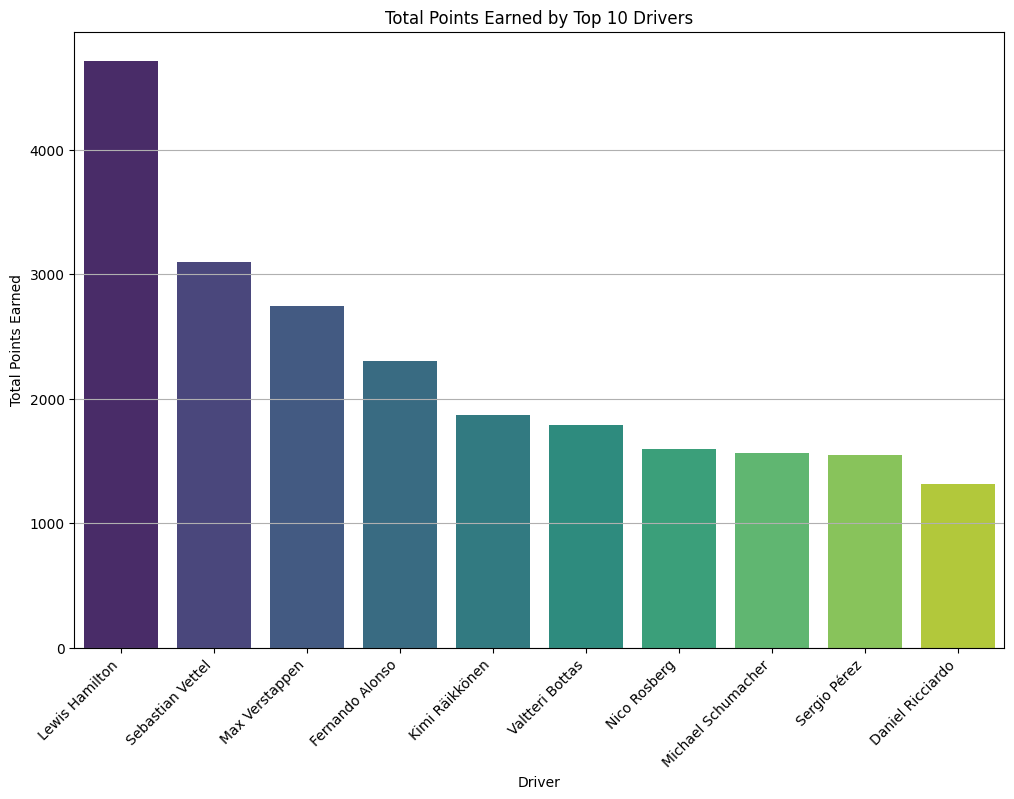

In [ ]:
driver_points = results.groupby('driverId')['points'].sum().reset_index()

driver_points = driver_points.merge(drivers[['driverId', 'forename', 'surname']], on='driverId')

driver_points['full_name'] = driver_points['forename'] + ' ' + driver_points['surname']

top_10_drivers = driver_points.nlargest(10, 'points')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_drivers.sort_values(by='points', ascending=False),
            x='full_name',
            y='points',
            palette='viridis')

plt.title('Total Points Earned by Top 10 Drivers')
plt.xlabel('Driver')
plt.ylabel('Total Points Earned')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()


## ***Primary Analysis***

*ML Algorithm Design and Development*

Before we could decide what machine learning model we wanted to use we first had to classify what type of problem it was. Since we are predicting the Constructor’s Title winner, it would be a **Classification Problem**, as we simply need to identify the most likely winner based on a set of features like performance metrics and race results.
A classification problem involves predicting a discrete category or class label whereas a regression problem predicts continuous numerical values like age or height.


We first used **Logistic Regression** as it is a simple and interpretable model that can often serve as a good baseline for classification problems. Logistic regression works by combining all the input features using a linear function, then using a sigmoid function to convert the result to a probability between 0 and 1, where different class labels(eg. 1st place, 2nd place, 3rd place, etc) would be assigned according to the particular threshold). The model is further trained by optimizing a loss function, where we try to minimize the loss between the predicted values and the expected values, which is usually done with the use of gradient descent.


**How Logistic Regression Works**


1.  Linear Combination of Features:
Each feature (e.g., average lap time, total points from previous races, car reliability scores) is assigned a weight, which is adjusted during training to improve predictions. The linear equation might look like this:
z=w1x1+w2x2+…+wnxn+b  where w are the weights, x are the feature values, and b is the bias term.
2.   Sigmoid Function:
The linear output zzz is passed through the sigmoid function:
σ(z)= 1/(1 + e-z)
This maps z to a value between 0 and 1, which represents the probability of belonging to a specific class.
3. Prediction and Thresholding:
For binary classification, a threshold (typically 0.5) determines the class label. For multiclass classification like ours, the model assigns probabilities to each class, and the class with the highest probability is selected.
4. Optimization with Gradient Descent:
During training, the model uses a loss function, typically cross-entropy loss, to measure the error between predicted and actual labels. The loss is minimized using gradient descent, which iteratively updates weights to improve predictions.


**Challenges with Logistic Regression**

While Logistic Regression is a powerful baseline model, it has limitations. One major challenge we encountered was that Logistic Regression assumes a linear relationship between the features and the target variable. This means it expects the data to be linearly separable—a condition where the classes can be separated by a straight line (or hyperplane in higher dimensions).
In the case of our Formula 1 dataset, the relationships between features like race results, constructor performance, and environmental factors (e.g., weather conditions or track layout) were highly non-linear and complex. As a result, Logistic Regression struggled to capture the nuances of the data, leading to suboptimal predictions and potential overfitting.

[Cool Video on Logistic Regression!](https://www.youtube.com/watch?v=zAULhNrnuL4&ab_channel=BrandonFoltz)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore") #to ignore warnings

df = constructor_standings.groupby(['raceId', 'constructorId'])['points'].sum().reset_index()

# get the winner per race
df['winner_constructor'] = df.groupby('raceId')['points'].transform(lambda x: x.idxmax())


df_pivoted = df.pivot(index='raceId', columns='constructorId', values='points')
df_pivoted['winner_constructor'] = df.groupby('raceId')['points'].transform(lambda x: x.idxmax())

# fill NA values with 0
df_pivoted.fillna(0, inplace=True)


X = df_pivoted.drop(columns=['winner_constructor'])
y = df_pivoted['winner_constructor']

y = y.astype(int)

# split the data(80% test & 20% train with a random state of 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
from sklearn.linear_model import LogisticRegression

# perform k fold validation where k = 5(number of folds) to evaluate the performance
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average F1-score: {np.mean(f1_scores)}")

Average Accuracy: 0.8331465026201867
Average Recall: 0.8331465026201867
Average Precision: 0.8844287124738253
Average F1-score: 0.8312043663533754


**Transition to Random Forest**

To address these challenges and better handle the complexities of our dataset, we transitioned to a *Random Forest model*, a more robust and flexible algorithm. Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their outputs to make a final prediction. Unlike Logistic Regression, Random Forest does not assume linearity and can model highly non-linear relationships.

Why Random Forest?


1.   Captures Non-linear Relationships
2.   Reduced Risk of Overfitting
3.   Feature Importance Analysis

Since Random Forest uses bootstrap sampling (random sampling with replacement), it is more robust to missing data and can handle imbalances in class distribution better than Logistic Regression.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = results[['raceId', 'driverId', 'points', 'laps']]
y = results['constructorId']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8546380090497737


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Recall: 0.8546380090497737
Precision: 0.8568969317758227
F1 Score: 0.8529362727954798


Using Random Forest, we observed significant improvements in prediction accuracy compared to Logistic Regression. The model was able to identify non-linear interactions between features, such as the interplay between driver skill and car reliability, as well as the importance of race-specific factors like track layout. Additionally, Random Forest’s ensemble approach ensured stable and reliable predictions even in cases where individual features had high variance.


The model demonstrated strong performance, with key metrics as follows:
*Recall*: 0.854, indicating a high rate of correctly identifying true positives.

*Precision*: 0.856, showing a balanced avoidance of false positives.

*F1-Score*: 0.852, reflecting a harmonic mean of precision and recall.

*Accuracy*: 0.854, ensuring overall reliability in predictions.

These metrics highlight the Random Forest Classifier's capability to deliver balanced and robust predictions, making it an excellent choice for forecasting Constructor Winners in F1.


## ***Visualization***

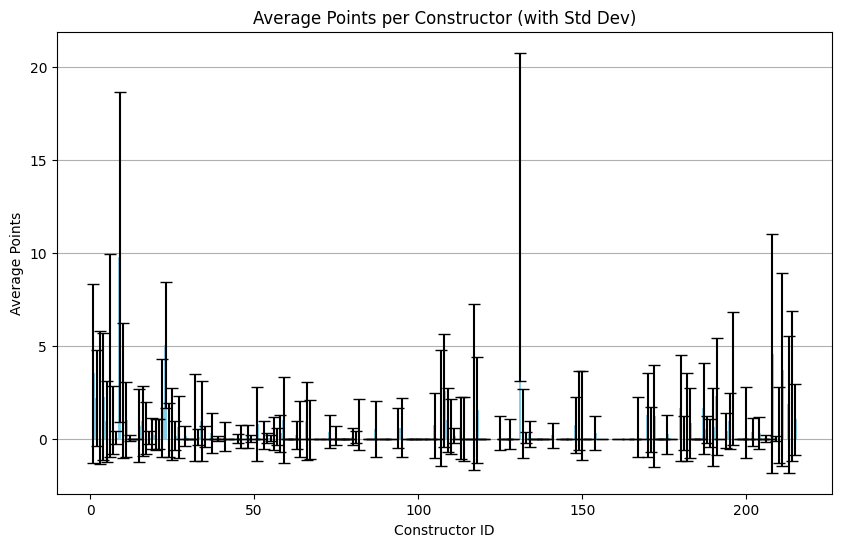

In [ ]:
constructor_summary = results.groupby('constructorId')['points'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(constructor_summary['constructorId'], constructor_summary['mean'], yerr=constructor_summary['std'], color='skyblue', capsize=4)
plt.title('Average Points per Constructor (with Std Dev)')
plt.xlabel('Constructor ID')
plt.ylabel('Average Points')
plt.grid(axis='y')
plt.show()


This plot shows how points vary across constructors. We can see that there are so many values for points that that bottom half looks cluttered, but it is clear that we can see more frequent point totals towards the bottom since 0 is very common, and towards the top for the most dominant drivers over the past few years

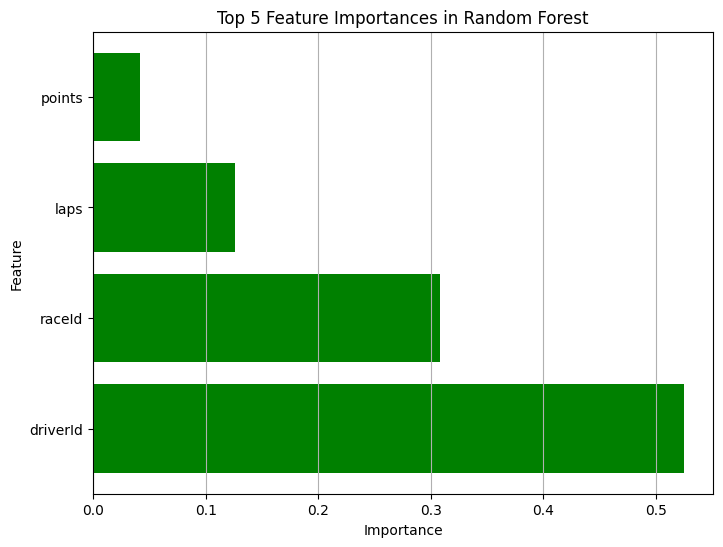

In [ ]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# select top 5 features for simplicity
top_features = importances.head(5)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.title('Top 4 Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


What we can see from this graph is the importance of a specific feature in our random foreset model, where the driverId was very important in calculating the constructor winners, while the least important was points and laps. It is interesting that raceId was important, maybe symbolizing that certain races benefit certain drivers in F1.

<Figure size 1000x800 with 0 Axes>

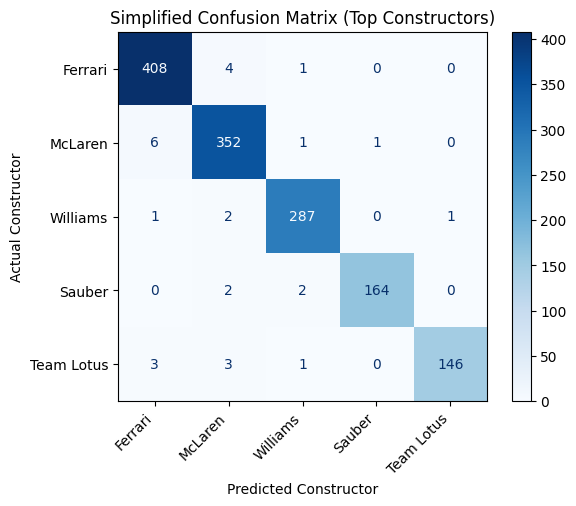

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

constructor_names = constructors.set_index('constructorId')['name'].to_dict()

most_common = y_test.value_counts().head(5).index
filtered_y_test = y_test[y_test.isin(most_common)]
filtered_y_pred = y_pred[y_test.isin(most_common)]

mapped_labels = [constructor_names[cid] for cid in most_common]

cm = confusion_matrix(filtered_y_test, filtered_y_pred, labels=most_common)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mapped_labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Simplified Confusion Matrix (Top Constructors)')
plt.xlabel('Predicted Constructor')
plt.ylabel('Actual Constructor')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.show()


Whats important to see here in comparison to other graphs is both the fact that our model does not get confused that much and that we are able to correctly predict constructors, but also the fact that for all of the wrong predictions, they are not that high on any one square, showing that the error isn't biased towards one square. This means our model is performing well.

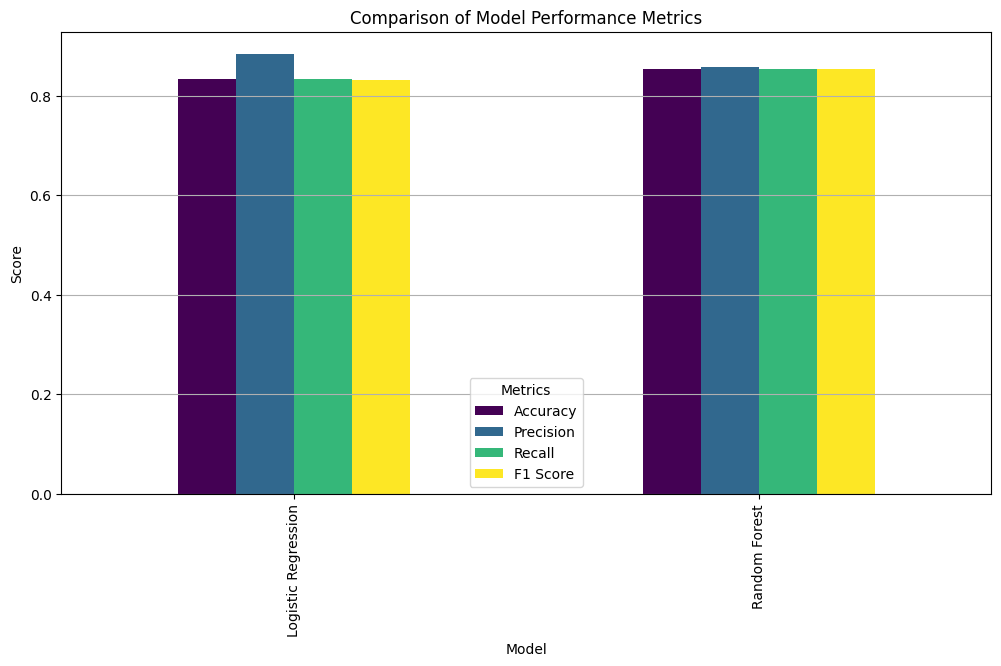

In [ ]:
metrics = {
    'Accuracy': [np.mean(accuracy_scores), accuracy],
    'Precision': [np.mean(precision_scores), precision],
    'Recall': [np.mean(recall_scores), recall],
    'F1 Score': [np.mean(f1_scores), f1]
}
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression', 'Random Forest'])

metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metrics', loc='best')
plt.grid(axis='y')
plt.show()


High accuracy, precision, recall, and F1 score collectively indicate that the model is effective in making correct predictions and managing trade-offs between false positives and false negatives. High precision shows the model's reliability in identifying true winners without overestimating them, while high recall demonstrates its ability to capture most actual winners without missing key cases. The F1 score balances these aspects, confirming the model's robustness in both correctness and completeness. Overall, these metrics show that the model is not only identifying the correct constructors accurately but also minimizing errors, making it highly reliable for predicting F1 race outcomes.

## ***Insights and Conclusions***

The Random Forest Classifier has proven to be a strong choice for this task, demonstrating excellent performance across all key metrics (accuracy, precision, recall, and F1 score). Its ability to handle non-linear relationships, coupled with robustness against overfitting, ensures reliable and balanced predictions. This makes it a valuable tool for forecasting outcomes in the highly competitive and data-intensive world of Formula 1.

Future work could explore advanced ensemble methods, such as gradient boosting or stacking, and incorporate additional data sources to further enhance predictive accuracy.


For anyone new to Formula 1, this project breaks down how data analytics can uncover patterns and help predict outcomes in one of the most exciting sports in the world. It simplifies the technical side of racing and highlights the key role of factors like consistent qualifying performance and teamwork.
For F1 fans and experts, this project showcases how machine learning is reshaping motorsports. Our findings show that winning in Formula 1 isn’t just about being the fastest—it’s also about using resources wisely, adapting strategies, and making smart decisions both on and off the track.


This project shows how combining data science and sports can lead to useful insights, opening the door to even more ways predictive modeling can be used in competitive environments.


In [2]:
from IPython.display import Image
Image(url='https://i.pinimg.com/originals/9f/dd/4a/9fdd4a83e3dae81b1c0e4788522626b3.gif')